In [1]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
from matplotlib import rcParams

# USE FILTER BELOW

In [10]:
df = pd.read_csv(r'C:\Users\Feele\Documents\Data\Sunderland\2122\Home\Wimbledon.csv')

In [11]:
df = df[df['teamId']==16]
#df = df[df['type/value']==1]
df = df[(df['y']>0) & (df['y'] <100)] #eliminate throws
df = df[df['type/displayName'].isin(['KeyPass','Pass','Assist'])]

In [12]:
#df['number'].value_counts(dropna = False)

df['name'].value_counts(dropna = False)

Doyle         70
Neil          62
Embleton      61
Flanagan      55
Onien         51
Winchester    48
Patterson     34
Stewart       26
Gooch         25
McGeady       24
Pritchard     21
Wright        10
Broadhead      9
Cirkin         6
Name: name, dtype: int64

In [5]:
df = df[df['name']=='Winchester'] #player

## Plotting and Pitch

In [6]:
# Inflating X and Y to pitch size (statsbomb pitches don't match with WhoScored data)

df['x'] = df['x']*1.2
df['endX'] = df['endX']*1.2
df['y'] = df['y']*.8
df['endY'] = df['endY']*.8

## Pass Map

#### Light Pitch 

Background - #FFFFFF
lines - #B4B6BA

#### Dark Pitch

Background - #1B1B1B
lines - #c7d5cc

#### Blue Pitch (Primary colour)
Background - #0B0725
lines - #B4B6BA

In [7]:
df1 = df.loc[df['outcomeType/displayName']=='Successful'].reset_index()
df2 = df.loc[df['outcomeType/displayName']=='Unsuccessful'].reset_index()
df3 = df.loc[df['type/displayName']=='Assist'].reset_index()

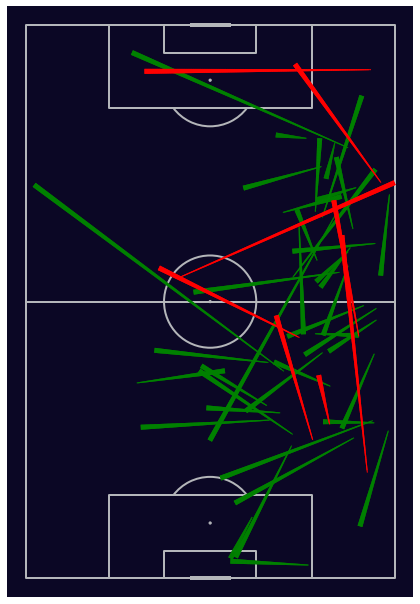

In [8]:
pitch = VerticalPitch(pitch_type='statsbomb',
              line_color='#B4B6BA',
              pitch_color='#0B0725')


fig,ax = pitch.draw(figsize=(13,8.5))
plt.gca().invert_xaxis()


pl1 = pitch.lines(df1.x,
                  df1.y,
                  df1.endX,
                  df1.endY,
                  comet=True,
                  ax=ax,
                  color='green')

pl2 = pitch.lines(df2.x,
                  df2.y,
                  df2.endX,
                  df2.endY,
                  comet=True,
                  ax=ax,
                  color='red')

pl3 = pitch.lines(df3.x,
                  df3.y,
                  df3.endX,
                  df3.endY,
                  comet=True,
                  ax=ax,
                  color='#02E5E5')

plt.savefig('pass.png',dpi=500,bbox_inches = 'tight')

In [13]:
df['outcomeType/displayName'].value_counts(dropna = False)

Successful      373
Unsuccessful    129
Name: outcomeType/displayName, dtype: int64